In [1]:
!pip install laspy
!pip install open3d
!python3 -m pip install "laspy[lazrs,laszip]"

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: /usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: /usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
#imports
import laspy 
import open3d as o3d
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
las_path = "data.laz"
las_data = laspy.read(las_path)


def filter_by_classification(las_path, desired_classification=1):
    # Read the LAS file
    las_data = laspy.read(las_path)

    # Extract the points and classifications from the LAS file
    points = np.vstack((las_data.x, las_data.y, las_data.z)).transpose()
    classifications = las_data.classification
    
    # Filter points based on the desired classification
    filtered_points = points[classifications == desired_classification]

    # Create an Open3D PointCloud object
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(filtered_points)
    num0 = points.shape[0]
    num1 = filtered_points.shape[0]
    print(f'reduced from {num0} to {num1} points')
    print(f' {100-(num1/num0 * 100)} % less points')

    return pcd

# Usage
pcd = filter_by_classification("data.laz")

reduced from 15568025 to 11248498 points
 27.74614634804351 % less points


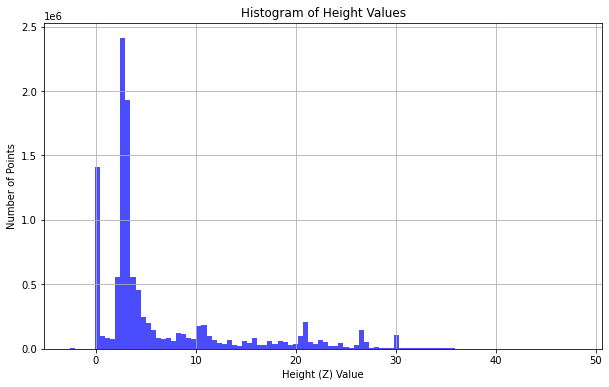

In [7]:
# Height histogram

# Convert the point cloud to a numpy array
points = np.asarray(pcd.points)

# Assuming dataset is your point cloud data as a numpy array
z_values = points[:, 2]

plt.figure(figsize=(10, 6))
plt.hist(z_values, bins=100, color='blue', alpha=0.7)
plt.xlabel('Height (Z) Value')
plt.ylabel('Number of Points')
plt.title('Histogram of Height Values')
plt.grid(True)
plt.show()

In [ ]:
# Downsampling